# Prueba de TFM

## Autor:
Alejandro Belda Fernández

## Importar librerías

In [1]:
from scipy.io import arff
import pandas as pd
from sklearn.metrics import make_scorer
import numpy as np
import csv
from sklearn.linear_model import SGDClassifier
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from matplotlib import gridspec
from sklearn.preprocessing import StandardScaler
import random
from IPython.display import display
from joblib import dump, load
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import shap
from sklearn.linear_model import LogisticRegression
import matplotlib.patches as mpatches
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils import resample


In [2]:
shap.initjs() # you need this so the plots can be displayed

In [3]:
semilla=123
np.random.seed(semilla)
random.seed(semilla)

## Preprocesamiento y analisis

In [4]:
csv_file_path = "Data/SEA_subsampled.csv"

# Leer el archivo ARFF
df = pd.read_csv(csv_file_path)
# Si alguna columna tiene datos binarios o categóricos, decodificar


# Mostrar el DataFrame
print(df.head())

    attrib1   attrib2   attrib3      class  n_chunk
0  6.775948  4.540750  2.745850  b'groupB'        1
1  5.947926  2.464241  4.395693  b'groupB'        1
2  1.693422  8.107573  7.014556  b'groupB'        1
3  3.197723  5.865287  9.441949  b'groupB'        1
4  4.048404  9.953767  3.592251  b'groupB'        1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   attrib1  10000 non-null  float64
 1   attrib2  10000 non-null  float64
 2   attrib3  10000 non-null  float64
 3   class    10000 non-null  object 
 4   n_chunk  10000 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 390.8+ KB


No hay valores nulos

In [6]:
df.describe()

,attrib1,attrib2,attrib3,n_chunk
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.561692,5.447437,5.009077,5.500000
std,2.814490,2.830570,2.893109,2.872425
min,0.000396,0.000576,0.000234,1.000000
25%,3.236507,3.093522,2.507252,3.000000
50%,5.861498,5.620516,4.974635,5.500000
75%,7.993967,7.913778,7.515266,8.000000
max,9.998681,9.998186,9.999836,10.000000


No encuentro valores extraños por lo que no aplicaria normalizacion

In [7]:
df.dtypes

,0
attrib1,float64
attrib2,float64
attrib3,float64
class,object
n_chunk,int64


In [8]:
for i in range(0, df.shape[0], 1000):
    batch = df.iloc[i:i+1000]
    print(batch[:]["class"].value_counts())

    # Aquí puedes hacer lo que necesites con el batch, como entrenar un modelo

class
b'groupB'    800
b'groupA'    200
Name: count, dtype: int64
class
b'groupB'    900
b'groupA'    100
Name: count, dtype: int64
class
b'groupB'    850
b'groupA'    150
Name: count, dtype: int64
class
b'groupB'    850
b'groupA'    150
Name: count, dtype: int64
class
b'groupB'    800
b'groupA'    200
Name: count, dtype: int64
class
b'groupB'    900
b'groupA'    100
Name: count, dtype: int64
class
b'groupB'    900
b'groupA'    100
Name: count, dtype: int64
class
b'groupB'    850
b'groupA'    150
Name: count, dtype: int64
class
b'groupB'    800
b'groupA'    200
Name: count, dtype: int64
class
b'groupB'    800
b'groupA'    200
Name: count, dtype: int64


En principio no habria que aplicar one-ho encoding

<Axes: >

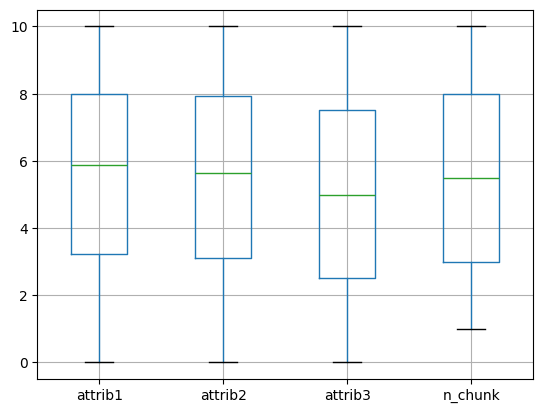

In [9]:
df.boxplot()

In [10]:
df = df.iloc[:, :-1]
print(df.head())

    attrib1   attrib2   attrib3      class
0  6.775948  4.540750  2.745850  b'groupB'
1  5.947926  2.464241  4.395693  b'groupB'
2  1.693422  8.107573  7.014556  b'groupB'
3  3.197723  5.865287  9.441949  b'groupB'
4  4.048404  9.953767  3.592251  b'groupB'


In [11]:
X = df.iloc[:, :-1]  # Selecciona todas las columnas menos la última
y = df.iloc[:, -1]   # Selecciona solo la última columna

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   attrib1  10000 non-null  float64
 1   attrib2  10000 non-null  float64
 2   attrib3  10000 non-null  float64
dtypes: float64(3)
memory usage: 234.5 KB


In [13]:
X.head()

,attrib1,attrib2,attrib3
0,6.775948,4.540750,2.745850
1,5.947926,2.464241,4.395693
2,1.693422,8.107573,7.014556
3,3.197723,5.865287,9.441949
4,4.048404,9.953767,3.592251


In [14]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: class
Non-Null Count  Dtype 
--------------  ----- 
10000 non-null  object
dtypes: object(1)
memory usage: 78.3+ KB


In [15]:
y.head()

,class
0,b'groupB'
1,b'groupB'
2,b'groupB'
3,b'groupB'
4,b'groupB'


In [16]:
y =y.astype(str).str.strip("b'")  # Elimina el prefijo manualmente
y.head()

,class
0,groupB
1,groupB
2,groupB
3,groupB
4,groupB


In [17]:
y = y.map({'groupA': 0, 'groupB': 1})

In [18]:
y.head()

,class
0,1
1,1
2,1
3,1
4,1


### Primer modelo

In [19]:
def train_in_batches(X, y, modelo, param_grid, batch_size=1000):
    num_instances = X.shape[0]
    results = []
    best_estimators = []
    iteration  = 0
    balanced_accuracy_drift = []
    X_trains = []
    y_trains = []
    X_tests = []
    y_tests = []
    name = modelo
    for start in range(0, num_instances, batch_size):
        end = min(start + batch_size, num_instances)
        X_batch, y_batch = X[start:end], y[start:end]
        print(y_batch.value_counts())

        # Dividir en train y test (80%-20%)
        X_train, X_test, y_train, y_test = train_test_split(X_batch, y_batch, test_size=0.2, random_state=semilla, stratify=y_batch)
        X_trains.append(X_train)
        y_trains.append(y_train)
        X_tests.append(X_test)
        y_tests.append(y_test)

        # Definir el modelo
        if modelo == "LogisticRegression":
            modelo = LogisticRegression(random_state=semilla)
        elif modelo == "Ridge":
            modelo = RidgeClassifier(random_state=semilla)
        elif modelo == "DecisionTreeClassifier":
            modelo = DecisionTreeClassifier(random_state=semilla)
        elif modelo == "SVC":
            modelo = SVC(random_state=semilla)



        scoring = {
            'balanced_accuracy': make_scorer(balanced_accuracy_score),
            'accuracy': make_scorer(accuracy_score),
            'f1': make_scorer(f1_score),
            'precision': make_scorer(precision_score),
            'recall': make_scorer(recall_score)
        }

        # Definir los hiperparámetros a buscar


        # Búsqueda de hiperparámetros con validación cruzada de 3 folds
        grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, cv=3, scoring=scoring, refit="balanced_accuracy", n_jobs=-1, error_score="raise")
        grid_search.fit(X_train, y_train)

        # Evaluar en test
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test)
        balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        results.append({
            'batch': start // batch_size + 1,
            'best_params': grid_search.best_params_,
            'test_balanced_accuracy' : balanced_accuracy,
            'test_accuracy': accuracy,
            'test_precision': precision,
            'test_recall': recall,
            'test_f1': f1
        })



        cv_results = grid_search.cv_results_
        print("\n====================================")
        print(f"Batch {start // batch_size + 1}")
        print("\nCross-validation results for the best parameters:")
        print(f"Mean Balanced Accuracy: {cv_results['mean_test_balanced_accuracy'][grid_search.best_index_]:.4f}")
        print(f"Mean Accuracy: {cv_results['mean_test_accuracy'][grid_search.best_index_]:.4f}")
        print(f"Mean F1 Score: {cv_results['mean_test_f1'][grid_search.best_index_]:.4f}")
        print(f"Mean Precision: {cv_results['mean_test_precision'][grid_search.best_index_]:.4f}")
        print(f"Mean Recall: {cv_results['mean_test_recall'][grid_search.best_index_]:.4f}")


        print("------------------------------------")
        print(f"Test Balanced Accuracy: {balanced_accuracy:.4f}")
        print(f"Test Accuracy: {accuracy:.4f}")
        print(f"Test F1 Score: {f1:.4f}")
        print(f"Test Precision: {precision:.4f}")
        print(f"Test Recall: {recall:.4f}")
        print("------------------------------------")



        best_estimators.append(best_model)
        dump(best_model, f"Models/SEA_1_{name}_{start // batch_size + 1}.joblib")
        if(iteration > 0 and iteration < 10):
            preds=best_estimators[iteration-1].predict(X_batch)
            balanced_accuracy_drift.append(balanced_accuracy_score(y_batch, preds))
            print(f"Balanced Accuracy Drift: {balanced_accuracy_drift[iteration-1]:.4f}")


        print("====================================\n")
        iteration += 1



    return results,best_estimators, balanced_accuracy_drift, X_trains, y_trains, X_tests, y_tests

In [20]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs'],
    'max_iter': [100, 200, 300, 500, 1000],
    'class_weight': [None, 'balanced'],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9] # Solo para elasticnet
}
#Change this to specify which solver works with which penalty
param_grid = [
    {'penalty': ['l1'], 'solver': ['liblinear', 'saga'], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'max_iter': [100, 200, 500, 1000], 'class_weight': [None, 'balanced']},
    {'penalty': ['l2'], 'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs'], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'max_iter': [100, 200, 500, 1000], 'class_weight': [None, 'balanced']},
    {'penalty': ['elasticnet'], 'solver': ['saga'], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'max_iter': [100, 200, 500, 1000], 'class_weight': [None, 'balanced'], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}
]


In [21]:
results, best_models, balanced_accuracy_drift, X_trains, y_trains, X_tests, y_tests=train_in_batches(X, y, "LogisticRegression", param_grid)

class
1    800
0    200
Name: count, dtype: int64

Batch 1

Cross-validation results for the best parameters:
Mean Balanced Accuracy: 0.8371
Mean Accuracy: 0.8450
Mean F1 Score: 0.8976
Mean Precision: 0.9522
Mean Recall: 0.8500
------------------------------------
Test Balanced Accuracy: 0.8781
Test Accuracy: 0.8500
Test F1 Score: 0.8986
Test Precision: 0.9779
Test Recall: 0.8313
------------------------------------

class
1    900
0    100
Name: count, dtype: int64

Batch 2

Cross-validation results for the best parameters:
Mean Balanced Accuracy: 0.8638
Mean Accuracy: 0.8650
Mean F1 Score: 0.9201
Mean Precision: 0.9827
Mean Recall: 0.8653
------------------------------------
Test Balanced Accuracy: 0.8583
Test Accuracy: 0.8650
Test F1 Score: 0.9204
Test Precision: 0.9811
Test Recall: 0.8667
------------------------------------
Balanced Accuracy Drift: 0.8344

class
1    850
0    150
Name: count, dtype: int64

Batch 3

Cross-validation results for the best parameters:
Mean Balanced Ac

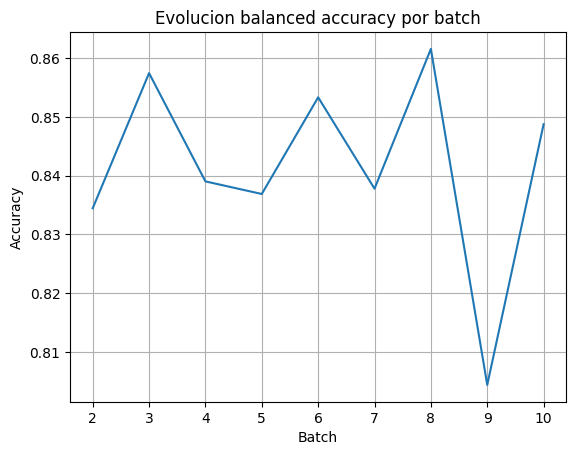

In [22]:
# Crear los valores del eje x sumándole 1 a cada índice
x_values = np.arange(len(balanced_accuracy_drift)) + 2

# Crear la figura y el eje
fig, ax = plt.subplots()

# Graficar el array con los valores del eje x ajustados
ax.plot(x_values, balanced_accuracy_drift)

# Añadir etiquetas y título
ax.set(xlabel='Batch', ylabel='Accuracy', title='Evolucion balanced accuracy por batch')

# Mostrar la cuadrícula
ax.grid()

# Mostrar el gráfico
plt.show()


### Segundo Modelo

In [23]:
param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Control de regularización
    "kernel": ["linear", "rbf", "poly", "sigmoid"],  # Diferentes funciones de kernel
    "gamma": ["scale", "auto", 0.001, 0.01, 0.1, 1],  # Parámetro para rbf, poly y sigmoid
    "degree": [2, 3, 4, 5],  # Solo aplica a kernel "poly"
    "coef0": [0.0, 0.1, 0.5, 1.0],  # Solo aplica a "poly" y "sigmoid"
    "class_weight": [None, "balanced"],  # Manejo de desbalanceo
    "max_iter": [1000, 5000, 10000],  # Número máximo de iteraciones
}


In [24]:
results, best_models, balanced_accuracy_drift, X_trains, y_trains, X_tests, y_test=train_in_batches(X, y, "SVC", param_grid)

class
1    800
0    200
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



Batch 1

Cross-validation results for the best parameters:
Mean Balanced Accuracy: 0.8597
Mean Accuracy: 0.8887
Mean F1 Score: 0.9290
Mean Precision: 0.9514
Mean Recall: 0.9078
------------------------------------
Test Balanced Accuracy: 0.8938
Test Accuracy: 0.8900
Test F1 Score: 0.9281
Test Precision: 0.9726
Test Recall: 0.8875
------------------------------------

class
1    900
0    100
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



Batch 2

Cross-validation results for the best parameters:
Mean Balanced Accuracy: 0.8673
Mean Accuracy: 0.9013
Mean F1 Score: 0.9431
Mean Precision: 0.9791
Mean Recall: 0.9097
------------------------------------
Test Balanced Accuracy: 0.8583
Test Accuracy: 0.9050
Test F1 Score: 0.9456
Test Precision: 0.9763
Test Recall: 0.9167
------------------------------------
Balanced Accuracy Drift: 0.8733

class
1    850
0    150
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



Batch 3

Cross-validation results for the best parameters:
Mean Balanced Accuracy: 0.8650
Mean Accuracy: 0.8813
Mean F1 Score: 0.9270
Mean Precision: 0.9693
Mean Recall: 0.8882
------------------------------------
Test Balanced Accuracy: 0.8637
Test Accuracy: 0.8850
Test F1 Score: 0.9297
Test Precision: 0.9682
Test Recall: 0.8941
------------------------------------
Balanced Accuracy Drift: 0.8525

class
1    850
0    150
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



Batch 4

Cross-validation results for the best parameters:
Mean Balanced Accuracy: 0.8654
Mean Accuracy: 0.8762
Mean F1 Score: 0.9233
Mean Precision: 0.9712
Mean Recall: 0.8809
------------------------------------
Test Balanced Accuracy: 0.7324
Test Accuracy: 0.8250
Test F1 Score: 0.8936
Test Precision: 0.9245
Test Recall: 0.8647
------------------------------------
Balanced Accuracy Drift: 0.8563

class
1    800
0    200
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



Batch 5

Cross-validation results for the best parameters:
Mean Balanced Accuracy: 0.8718
Mean Accuracy: 0.9150
Mean F1 Score: 0.9467
Mean Precision: 0.9497
Mean Recall: 0.9438
------------------------------------
Test Balanced Accuracy: 0.8094
Test Accuracy: 0.8600
Test F1 Score: 0.9108
Test Precision: 0.9286
Test Recall: 0.8938
------------------------------------
Balanced Accuracy Drift: 0.8213

class
1    900
0    100
Name: count, dtype: int64

Batch 6

Cross-validation results for the best parameters:
Mean Balanced Accuracy: 0.8623
Mean Accuracy: 0.9113
Mean F1 Score: 0.9492
Mean Precision: 0.9769
Mean Recall: 0.9236
------------------------------------
Test Balanced Accuracy: 0.8750
Test Accuracy: 0.8950
Test F1 Score: 0.9391
Test Precision: 0.9818
Test Recall: 0.9000
------------------------------------
Balanced Accuracy Drift: 0.8544

class
1    900
0    100
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



Batch 7

Cross-validation results for the best parameters:
Mean Balanced Accuracy: 0.8434
Mean Accuracy: 0.8588
Mean F1 Score: 0.9159
Mean Precision: 0.9781
Mean Recall: 0.8625
------------------------------------
Test Balanced Accuracy: 0.7861
Test Accuracy: 0.8950
Test F1 Score: 0.9405
Test Precision: 0.9595
Test Recall: 0.9222
------------------------------------
Balanced Accuracy Drift: 0.8483

class
1    850
0    150
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



Batch 8

Cross-validation results for the best parameters:
Mean Balanced Accuracy: 0.8640
Mean Accuracy: 0.8737
Mean F1 Score: 0.9220
Mean Precision: 0.9708
Mean Recall: 0.8779
------------------------------------
Test Balanced Accuracy: 0.8833
Test Accuracy: 0.8950
Test F1 Score: 0.9358
Test Precision: 0.9745
Test Recall: 0.9000
------------------------------------
Balanced Accuracy Drift: 0.7994

class
1    800
0    200
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



Batch 9

Cross-validation results for the best parameters:
Mean Balanced Accuracy: 0.8362
Mean Accuracy: 0.8800
Mean F1 Score: 0.9237
Mean Precision: 0.9392
Mean Recall: 0.9094
------------------------------------
Test Balanced Accuracy: 0.8031
Test Accuracy: 0.8500
Test F1 Score: 0.9038
Test Precision: 0.9276
Test Recall: 0.8812
------------------------------------
Balanced Accuracy Drift: 0.8263

class
1    800
0    200
Name: count, dtype: int64

Batch 10

Cross-validation results for the best parameters:
Mean Balanced Accuracy: 0.8670
Mean Accuracy: 0.8888
Mean F1 Score: 0.9284
Mean Precision: 0.9557
Mean Recall: 0.9031
------------------------------------
Test Balanced Accuracy: 0.8688
Test Accuracy: 0.8350
Test F1 Score: 0.8874
Test Precision: 0.9774
Test Recall: 0.8125
------------------------------------
Balanced Accuracy Drift: 0.8569



/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


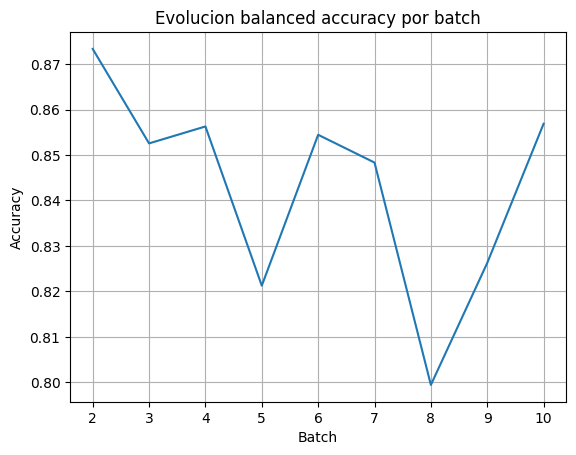

In [25]:
# Crear los valores del eje x sumándole 1 a cada índice
x_values = np.arange(len(balanced_accuracy_drift)) + 2

# Crear la figura y el eje
fig, ax = plt.subplots()

# Graficar el array con los valores del eje x ajustados
ax.plot(x_values, balanced_accuracy_drift)

# Añadir etiquetas y título
ax.set(xlabel='Batch', ylabel='Accuracy', title='Evolucion balanced accuracy por batch')

# Mostrar la cuadrícula
ax.grid()

# Mostrar el gráfico
plt.show()


### Tercer modelo

In [26]:
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],  # Más valores de regularización
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],  # Diversidad de solvers
    'tol': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1],  # Ajuste más fino de tolerancia
    'class_weight': [None, 'balanced'],  # Manejo de clases desbalanceadas
    'fit_intercept': [True, False],  # Evaluar modelos con y sin intercepto
    'max_iter': [1000, 5000, 10000, 50000],  # Mayor cantidad de iteraciones para garantizar convergencia
    'random_state': [123]  # Para reproducibilidad en algunos solvers estocásticos
}


In [27]:
results, best_models, balanced_accuracy_drift, X_trains, y_trains, X_tests, y_tests=train_in_batches(X, y, "Ridge", param_grid)

class
1    800
0    200
Name: count, dtype: int64

Batch 1

Cross-validation results for the best parameters:
Mean Balanced Accuracy: 0.8121
Mean Accuracy: 0.8050
Mean F1 Score: 0.8676
Mean Precision: 0.9493
Mean Recall: 0.8000
------------------------------------
Test Balanced Accuracy: 0.8625
Test Accuracy: 0.8250
Test F1 Score: 0.8797
Test Precision: 0.9771
Test Recall: 0.8000
------------------------------------

class
1    900
0    100
Name: count, dtype: int64

Batch 2

Cross-validation results for the best parameters:
Mean Balanced Accuracy: 0.8532
Mean Accuracy: 0.8263
Mean F1 Score: 0.8943
Mean Precision: 0.9852
Mean Recall: 0.8194
------------------------------------
Test Balanced Accuracy: 0.8444
Test Accuracy: 0.8400
Test F1 Score: 0.9042
Test Precision: 0.9805
Test Recall: 0.8389
------------------------------------
Balanced Accuracy Drift: 0.8156

class
1    850
0    150
Name: count, dtype: int64

Batch 3

Cross-validation results for the best parameters:
Mean Balanced Ac

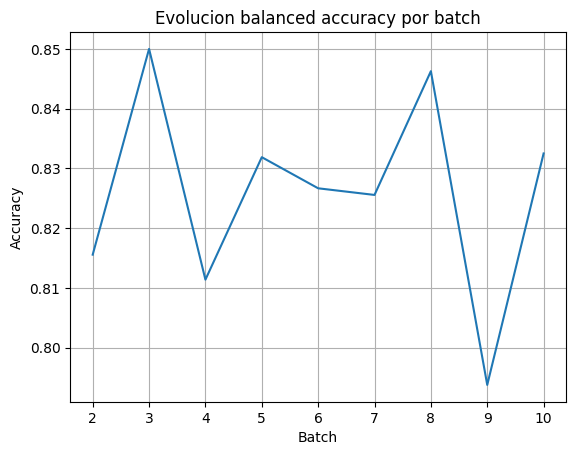

In [28]:
# Crear los valores del eje x sumándole 1 a cada índice
x_values = np.arange(len(balanced_accuracy_drift)) + 2

# Crear la figura y el eje
fig, ax = plt.subplots()

# Graficar el array con los valores del eje x ajustados
ax.plot(x_values, balanced_accuracy_drift)

# Añadir etiquetas y título
ax.set(xlabel='Batch', ylabel='Accuracy', title='Evolucion balanced accuracy por batch')

# Mostrar la cuadrícula
ax.grid()

# Mostrar el gráfico
plt.show()


In [29]:
import shutil

shutil.make_archive("Models_SEA_1", "zip", "Models")

'/content/Models_SEA_1.zip'